<a href="https://colab.research.google.com/github/aniray2908/ML-foundations-rebuild/blob/main/statistical_learning/02_ridge_vs_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge vs Lasso Regression

In this notebook, we will:

- Generate data with many correlated features
- Fit OLS, Ridge, and Lasso models
- Compare coefficient behavior
- Visualize shrinkage and sparsity

Goal:
Understand how L2 and L1 penalties behave differently.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Step 1: Generate Correlated Features

We create:

- 100 samples
- 20 features
- Only first 5 are truly important
- Features are correlated

This allows us to observe:
- Multicollinearity effects
- Shrinkage behavior
- Feature selection (Lasso)


In [2]:
np.random.seed(42)

n = 100
p = 20

X = np.random.randn(n, p)

# Introduce correlation
X[:, 5:] = X[:, :15] + np.random.normal(0, 0.1, size=(n, 15))

true_coefs = np.zeros(p)
true_coefs[:5] = [3, -2, 1.5, 0, 2]

y = X @ true_coefs + np.random.normal(0, 1, size=n)

## Step 2: Train/Test Split

We reserve part of data for evaluating generalization.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 3: Fit Models

We compare:

- OLS (no regularization)
- Ridge (L2 penalty)
- Lasso (L1 penalty)

We use moderate regularization strength.


In [4]:
ols = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ols.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

## Step 4: Compare Coefficients

We examine how coefficients differ:

- OLS: Unstable under correlation
- Ridge: Shrinks smoothly
- Lasso: Shrinks and zeros out some coefficients


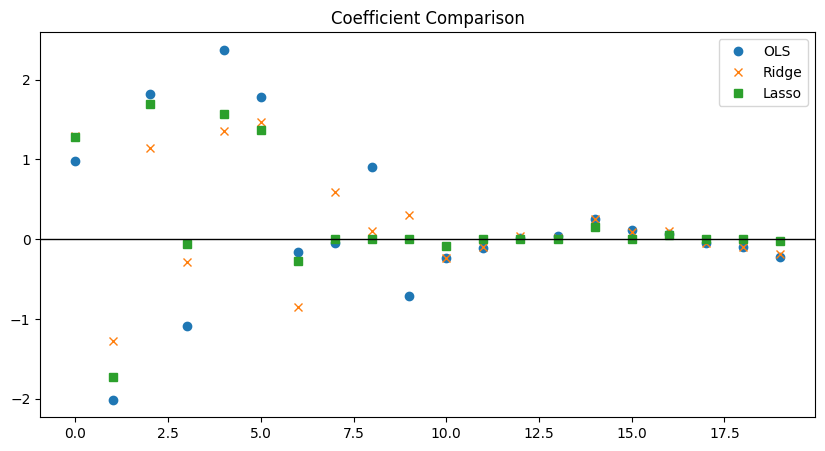

In [5]:
plt.figure(figsize=(10,5))

plt.plot(ols.coef_, 'o', label='OLS')
plt.plot(ridge.coef_, 'x', label='Ridge')
plt.plot(lasso.coef_, 's', label='Lasso')

plt.axhline(0, color='black', linewidth=1)
plt.legend()
plt.title("Coefficient Comparison")
plt.show()

## Step 5: Count Zero Coefficients

Lasso should set some coefficients exactly to zero.


In [6]:
print("Number of zero coefficients (Lasso):",
      np.sum(lasso.coef_ == 0))

Number of zero coefficients (Lasso): 9


## Step 6: Compare Test Error

We evaluate generalization performance.

In [7]:
models = {"OLS": ols, "Ridge": ridge, "Lasso": lasso}

for name, model in models.items():
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"{name} Test MSE: {mse:.4f}")

OLS Test MSE: 1.5826
Ridge Test MSE: 1.5214
Lasso Test MSE: 1.2820


## Observations

OLS:
- May show unstable coefficients due to multicollinearity.

Ridge:
- Coefficients are shrunk smoothly.
- No coefficients become exactly zero.
- Lower variance.

Lasso:
- Some coefficients become exactly zero.
- Performs feature selection.
- Useful when true signal is sparse.

Key Insight:
L2 shrinks continuously.
L1 creates sparsity.
